`Table Booking and Online Delivery to understand how these factors are distributed and their relationships with other features.`

### **Table Booking and Online Delivery Analysis**

1. **Percentage of Restaurants Offering Table Booking and Online Delivery**
2. **Comparison of Average Ratings Based on Table Booking Availability**
3. **Analysis of Online Delivery Availability by Price Range**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
file_path = r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Cognifyz-Data-Mastery-Program\DATASETS\Dataset .csv'
DATASET = pd.read_csv(file_path)

Determine the Percentage of Restaurants Offering Table Booking and Online Delivery

> Percentage of restaurants offering table booking

In [10]:
table_booking_percentage = (DATASET['Has Table booking'].value_counts(normalize=True) * 100).round(2)
print("Percentage of restaurants with and without table booking:")
print(table_booking_percentage)

Percentage of restaurants with and without table booking:
Has Table booking
No     87.88
Yes    12.12
Name: proportion, dtype: float64


> Percentage of restaurants offering online delivery

In [11]:
online_delivery_percentage = (DATASET['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print("\\nPercentage of restaurants with and without online delivery:")
print(online_delivery_percentage)

\nPercentage of restaurants with and without online delivery:
Has Online delivery
No     74.34
Yes    25.66
Name: proportion, dtype: float64


The value_counts(normalize=True) method calculates the relative frequency of values, and multiplying by 100 converts it to a percentage.

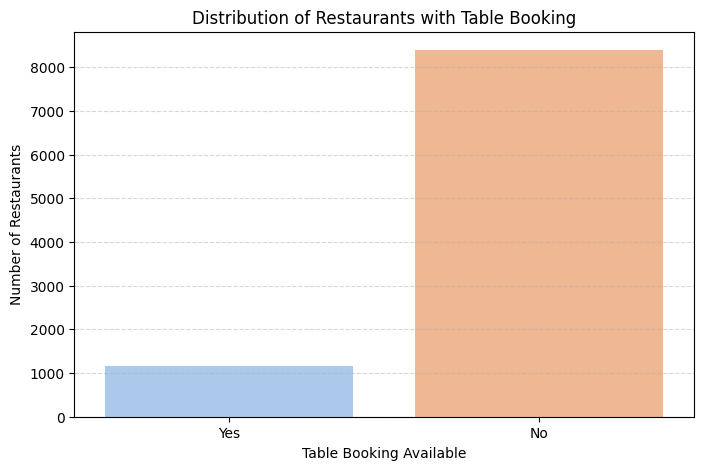

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Has Table booking', data=DATASET, palette='pastel')
plt.title('Distribution of Restaurants with Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

- **`sns.countplot()`**: Displays the count of restaurants that have or do not have table booking.
- A `True` value indicates that table booking is available, while `False` means it is not.

### **Analyzing Online Delivery Distribution**

Now, we’ll do the same for online delivery services.

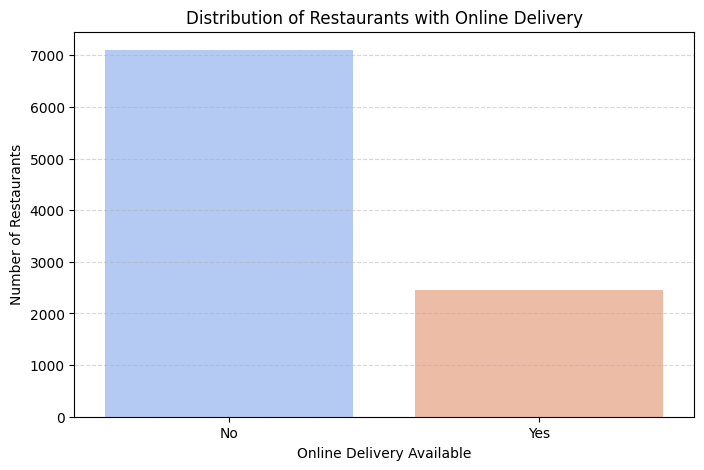

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Has Online delivery', data=DATASET, palette='coolwarm')
plt.title('Distribution of Restaurants with Online Delivery')
plt.xlabel('Online Delivery Available')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

This plot shows the number of restaurants that offer online delivery versus those that do not.

`Compare Average Ratings of Restaurants with and Without Table Booking`

In [12]:
# Average ratings comparison
avg_rating_with_table_booking = DATASET[DATASET['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table_booking = DATASET[DATASET['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("Average rating of restaurants with table booking:", round(avg_rating_with_table_booking, 2))
print("Average rating of restaurants without table booking:", round(avg_rating_without_table_booking, 2))

Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


This calculates the mean Aggregate rating for restaurants that offer and do not offer table booking.

### **Relationship with Aggregate Rating**

It’s important to understand how offering table booking or online delivery relates to the `Aggregate rating` of restaurants.

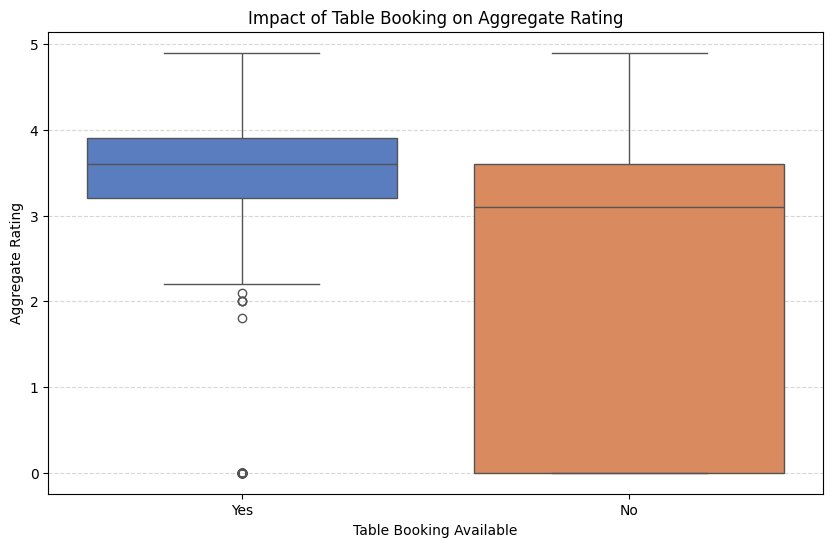

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=DATASET, palette='muted')
plt.title('Impact of Table Booking on Aggregate Rating')
plt.xlabel('Table Booking Available')
plt.ylabel('Aggregate Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

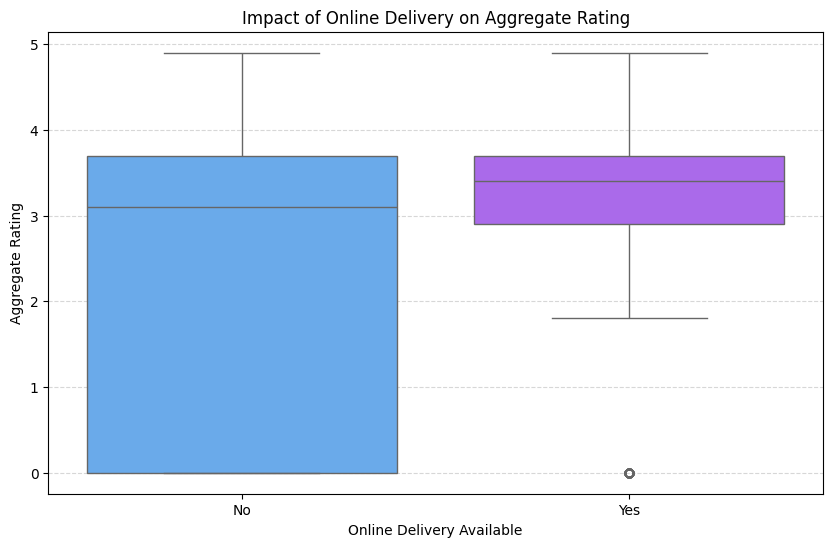

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=DATASET, palette='cool')
plt.title('Impact of Online Delivery on Aggregate Rating')
plt.xlabel('Online Delivery Available')
plt.ylabel('Aggregate Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

- **Boxplots**: Help visualize the distribution of ratings based on whether table booking or online delivery is available.
- This can reveal if restaurants with these services generally have higher or lower ratings.

We can explore the combined impact of table booking and online delivery on the Aggregate rating.

In [7]:
DATASET['Combined Service'] = DATASET.apply(lambda row: f"Booking: {row['Has Table booking']}, Delivery: {row['Has Online delivery']}", axis=1)

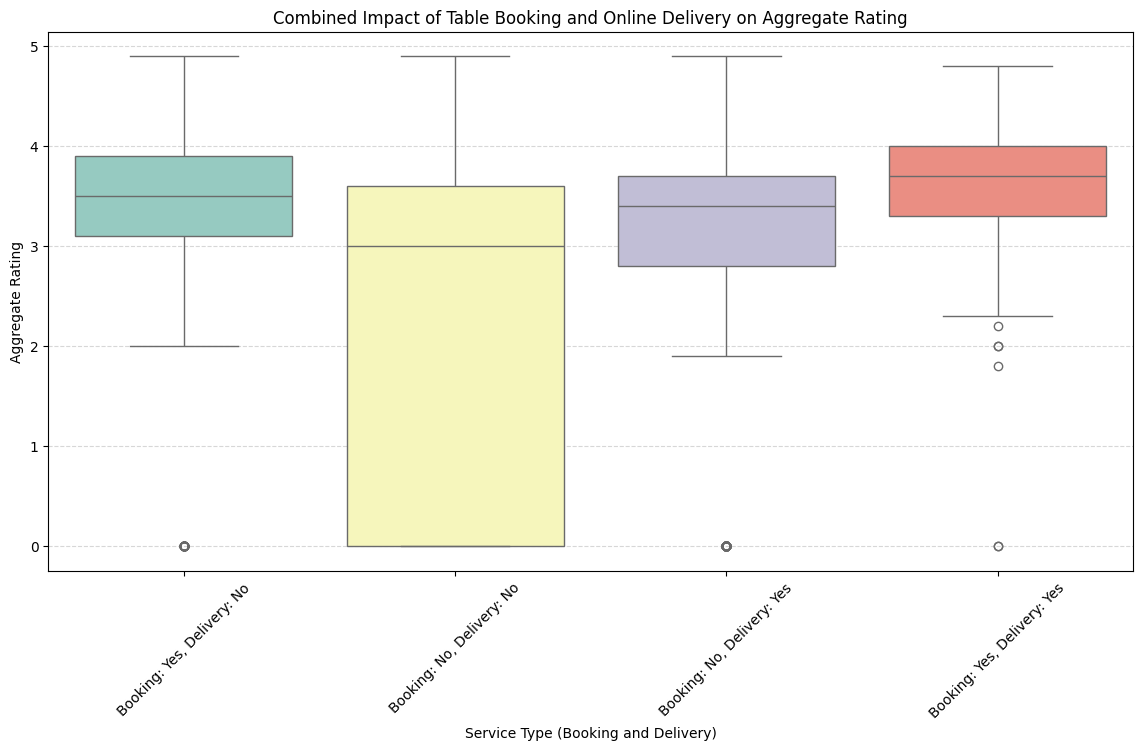

In [8]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Combined Service', y='Aggregate rating', data=DATASET, palette='Set3')
plt.title('Combined Impact of Table Booking and Online Delivery on Aggregate Rating')
plt.xlabel('Service Type (Booking and Delivery)')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

- This approach combines the two features into one and visualizes their joint effect on ratings.
- The `apply()` function is used to create a new column that combines `Has Table booking` and `Has Online delivery` for easy comparison.

- **Distribution**: Understand how common table booking and online delivery are among the restaurants in your dataset.
- **Ratings Impact**: See if these services correlate with higher or lower ratings, helping businesses decide whether offering these services might be beneficial.

`Analyze Online Delivery Availability Among Restaurants with Different Price Ranges`

In [13]:
# Create a new column to categorize price ranges
DATASET['Price Range Category'] = pd.cut(DATASET['Average Cost for two'], bins=[0, 500, 1000, 1500, 5000], labels=['Low', 'Medium', 'High', 'Very High'])

In [15]:
online_delivery_by_price = DATASET.groupby('Price Range Category')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Percentage of restaurants offering online delivery by price range:")
print(online_delivery_by_price.round(2))

Percentage of restaurants offering online delivery by price range:
Has Online delivery      No    Yes
Price Range Category              
Low                   82.12  17.88
Medium                54.91  45.09
High                  64.81  35.19
Very High             77.90  22.10


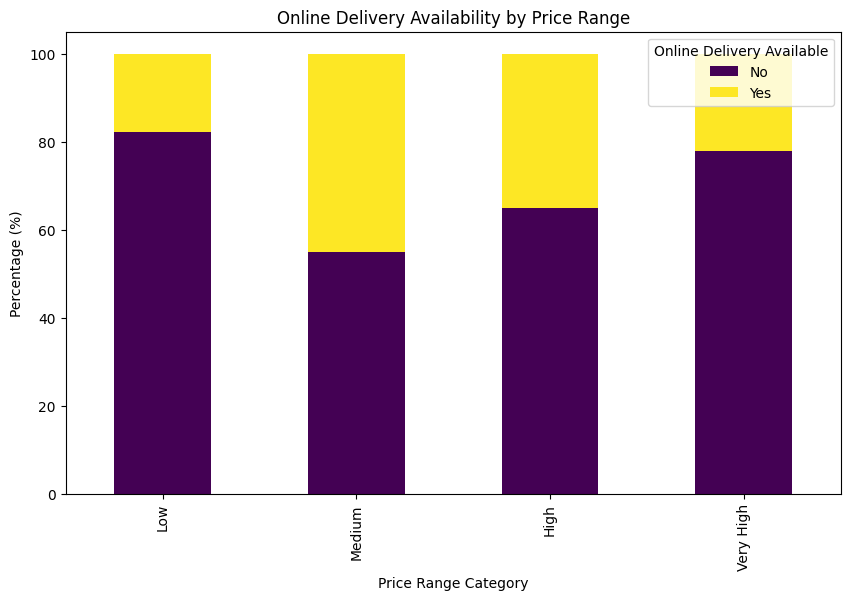

In [16]:
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Online Delivery Available')
plt.show()

- The `pd.cut()` function categorizes `Average Cost for two` into custom price range buckets.
- The `groupby()` and `value_counts()` methods calculate the percentage of restaurants within each price range that offer online delivery.
- A stacked bar chart visualizes the distribution.